## **CHENNAI HOUSE PRICE PREDICTION**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?



##IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

**IMPORTING THE DATA**

In [ ]:
df=pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
def check_df(dataframe, head=5, tail=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Data Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(tail))
    print("##################### Null VAlues #####################")
    print(dataframe.isnull().sum())

check_df(df)

##################### Shape #####################
(7109, 22)
##################### Data Types #####################
PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object
##################### Head #####################
   PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012         

In [ ]:
# to change the datatype from obj to datetime
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


## DATA CLEANING

In [ ]:
df[df.duplicated(keep = 'last' , subset = None)]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [ ]:
df.drop(['PRT_ID'], axis =1 , inplace = True) # Dropping the unwanted column

In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

There are a lot of duplicate data so we should replace them

In [ ]:
df['AREA'] = df['AREA'].replace({'TNagar':'T Nagar',
                                 'Chrompt':'Chrompet',
                                 'Chrmpet':'Chrompet',
                                 'Chormpet':'Chrompet',
                                 'Adyr':'Adyar',
                                 'Velchery':'Velachery',
                                 'Ann Nagar':'Anna Nagar',
                                 'Ana Nagar':'Anna Nagar',
                                 'KKNagar':'KK Nagar',
                                 'Karapakkam':'Karapakam'})

In [ ]:
df['AREA'].unique()

array(['Karapakam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

The duplicate areas has been replaced with the correct words

In [ ]:
print("**********NO OF BEDROOMS**********")
print(df['N_BEDROOM'].value_counts())
print("**********NO OF BATHROOMS**********")
print(df['N_BATHROOM'].value_counts())
print("**********NO OF ROOMS**********")
print(df['N_ROOM'].value_counts())
print("**********SLAES CONDITION**********")
print(df['SALE_COND'].value_counts())

**********NO OF BEDROOMS**********
1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64
**********NO OF BATHROOMS**********
1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64
**********NO OF ROOMS**********
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64
**********SLAES CONDITION**********
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64


In [ ]:
df['SALE_COND']=df['SALE_COND'].replace({'Ab Normal':'AbNormal',
                                         'AdjLand':'Adj Land',
                                         'Partiall':'Partial',
                                         'PartiaLl':'Partial'})
df['SALE_COND'].value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

Replced the misspelled words



In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

Replacing "NOO" with "NO" 

In [ ]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo':'No'})
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})
print('Replaced the misspelled words')
df['BUILDTYPE'].unique() 

Replaced the misspelled words


array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'AllPub':'All Pub',
                                                   'NoSewr ':'NoSewer', 
                                                   'NoSeWa':'NoSewer'})
df['UTILITY_AVAIL'].unique()

array(['All Pub', 'ELO', 'NoSewer'], dtype=object)

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df['STREET'] = df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'})
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
print('MZZONE \n',df['MZZONE'].unique())

print('QS_ROOMS \n',df['QS_ROOMS'].unique())

print('QS_BEDROOM \n',df['QS_BEDROOM'].unique())

print('QS_BATHROOM \n',df['QS_BATHROOM'].unique())

print('QS_OVERALL \n',df['QS_OVERALL'].unique())

print('REG_FEE \n',df['REG_FEE'].unique())

print('COMMIS \n',df['COMMIS'].unique())

MZZONE 
 ['A' 'RH' 'RL' 'I' 'C' 'RM']
QS_ROOMS 
 [4.  4.9 4.1 4.7 3.  4.5 3.6 2.4 2.9 3.1 2.2 2.1 4.8 3.8 2.3 3.5 4.6 2.8
 4.2 3.4 2.7 2.  4.3 3.9 2.6 3.3 2.5 3.7 3.2 4.4 5. ]
QS_BEDROOM 
 [4.9 2.5 2.2 3.6 4.1 3.1 2.1 4.  3.3 4.5 3.7 4.8 4.7 2.9 3.4 2.8 3.8 3.
 3.2 2.  4.3 3.9 3.5 2.6 4.4 2.4 4.6 5.  2.3 2.7 4.2]
QS_BATHROOM 
 [3.9 4.2 3.8 2.5 2.6 2.1 4.5 3.7 3.1 3.2 3.4 2.2 4.6 4.9 2.7 4.4 5.  2.8
 3.  2.9 3.6 4.  4.3 2.  3.3 4.7 2.3 4.1 4.8 3.5 2.4]
QS_OVERALL 
 [4.33  3.765 3.09  4.01  3.29  3.32  2.67  3.26  3.55  3.16  3.83  2.89
 2.26  3.19  3.66    nan 3.57  4.3   3.35  4.76  3.39  3.43  3.73  3.59
 3.74  2.29  3.17  4.18  2.755 2.11  2.605 4.58  4.2   3.27  4.19  2.98
 3.12  3.08  3.85  3.42  3.2   4.    3.34  2.825 3.46  4.07  3.68  2.95
 3.505 2.97  3.63  3.76  3.77  2.78  3.985 3.04  2.88  4.21  2.42  3.8
 2.54  3.84  2.395 3.14  2.49  3.175 2.84  4.17  3.13  3.98  3.36  3.735
 2.62  4.61  2.6   4.09  3.18  3.425 3.71  3.21  3.61  2.9   3.94  4.145
 4.26  4.16  3.5   3.22  3

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [ ]:
# To check the null values in the data frame
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Filling the null values

In [ ]:
df['N_BEDROOM'].fillna(float(df['N_BEDROOM'].mode()),inplace=True)

df['N_BATHROOM'].fillna(float(df['N_BATHROOM'].mode()),inplace=True)

df['QS_OVERALL'].fillna(float(df['QS_OVERALL'].mode()),inplace=True)

In [ ]:
df.isnull().sum().sum()

0

There are no more null values

## DATA VISUALISATION

**Plotting the columns individualy to find OverFitting**

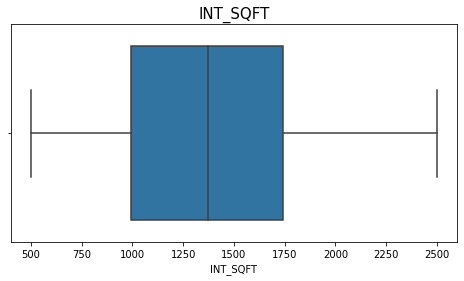

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(df['INT_SQFT'])
plt.title('INT_SQFT',size = 15)
plt.show()

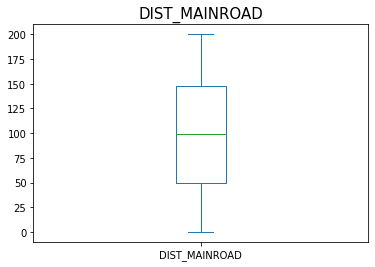

In [ ]:
df['DIST_MAINROAD'].plot(kind = 'box')
plt.title('DIST_MAINROAD',size = 15)
plt.show()

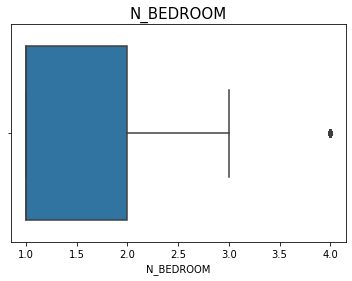

In [ ]:
sns.boxplot(df['N_BEDROOM'])
plt.title('N_BEDROOM',size = 15)
plt.show()

In [ ]:
df[df['N_BEDROOM']>3.5].shape
df[df['N_BEDROOM'] > 3.5]['N_BEDROOM'].unique()

array([4.])

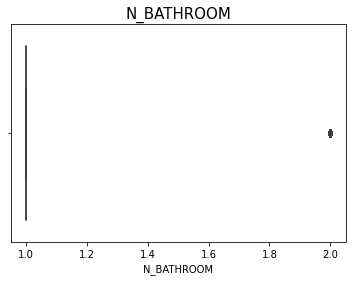

In [ ]:
sns.boxplot(df['N_BATHROOM'])
plt.title('N_BATHROOM',size = 15)
plt.show()

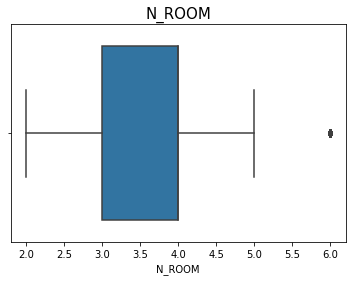

In [ ]:
sns.boxplot(df['N_ROOM'])
plt.title('N_ROOM',size = 15)
plt.show()

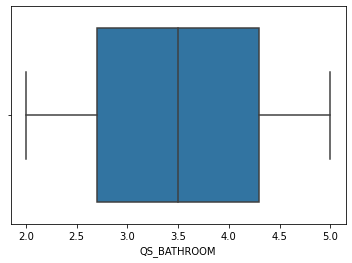

In [ ]:
sns.boxplot(df['QS_BATHROOM'])

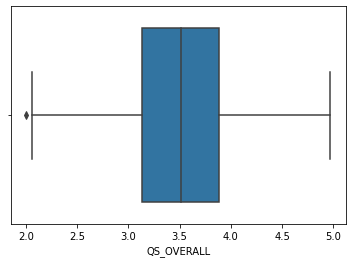

In [ ]:
sns.boxplot(df['QS_OVERALL'])

the values of N_BEDROOMS AND N_BATHROOMS are in flot So we change the to integer values for better results

In [ ]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int')
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int')

In [ ]:
for i in df.columns:
  if df[i].dtype == 'O':
    print(df[i].value_counts())
    print()

Chrompet      1702
Karapakam     1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

NoSewer    3700
All Pub    1887
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64



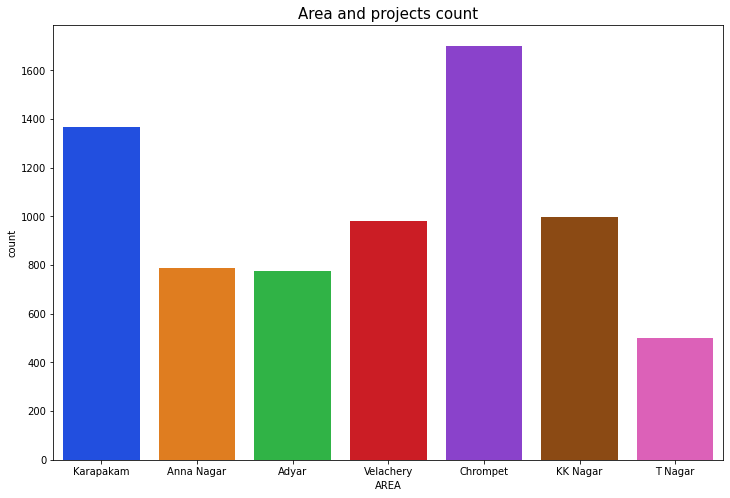

In [ ]:
plt.rcParams['figure.figsize']=(12,8)
sns.countplot(df['AREA'],palette="bright")
plt.title('Area and projects count', size = 15)
plt.show()

In [ ]:
df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values(by ='SALES_PRICE')

,AREA,SALES_PRICE
4,Karapakam,7.340100e+06
0,Adyar,9.185668e+06
2,Chrompet,1.001381e+07
6,Velachery,1.104735e+07
3,KK Nagar,1.269623e+07
1,Anna Nagar,1.516820e+07
5,T Nagar,1.561674e+07


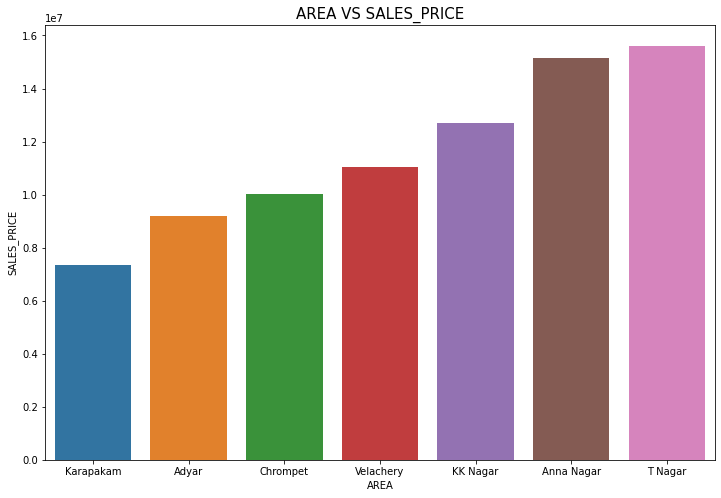

In [ ]:
sns.barplot(x='AREA',y='SALES_PRICE',data=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values(by='SALES_PRICE'))
plt.title('AREA VS SALES_PRICE',size=15)
plt.show()

**Anna Nagar and T Nagar has Highest Saes Price Compared to other areas**

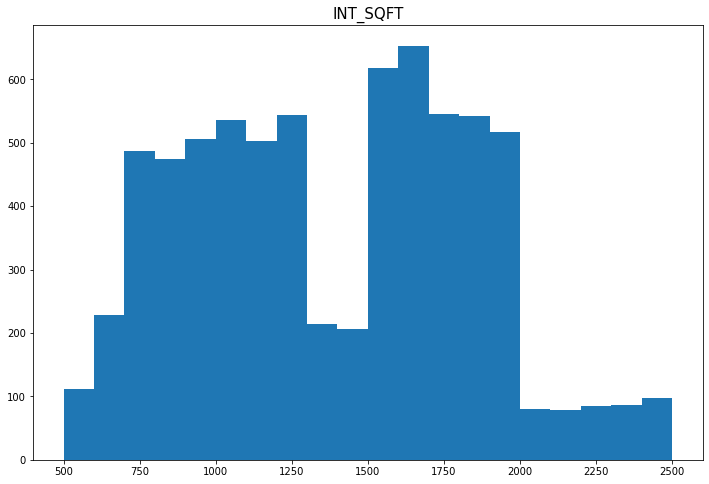

In [ ]:
df['PRICE_PER_SQFT']=df['SALES_PRICE']/df['INT_SQFT']
plt.hist(df['INT_SQFT'],bins=20)
plt.title('INT_SQFT',size=15)
plt.show()

There are only a small amount of projects done over 2000 sqft

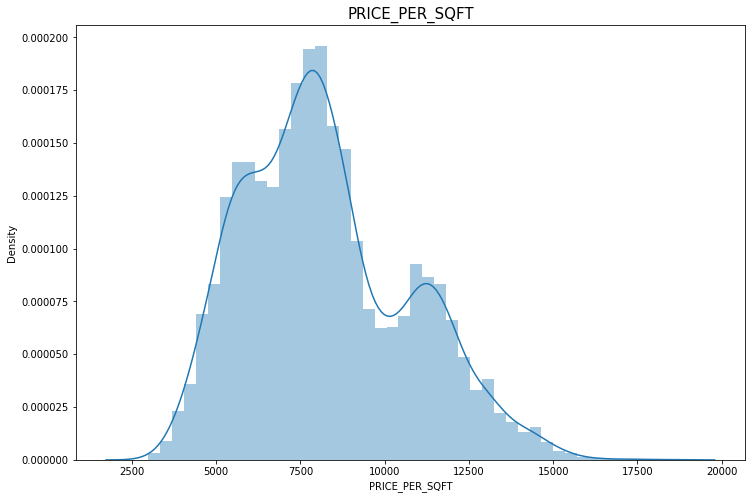

In [ ]:
sns.distplot(df['PRICE_PER_SQFT'])
plt.title('PRICE_PER_SQFT',size=15)
plt.show()

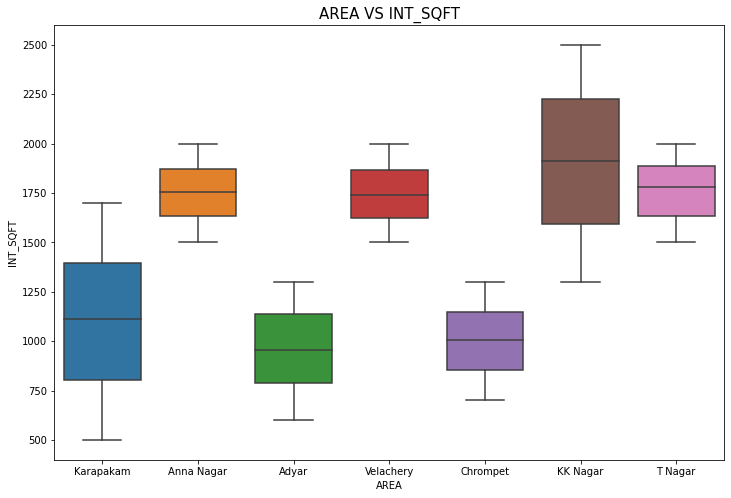

In [ ]:
sns.boxplot(df['AREA'],df['INT_SQFT'])
plt.title('AREA VS INT_SQFT',size=15)
plt.show()

**House Square Feet Values increases based on Areas**


In [ ]:
# to  get the year form date
df['SALE_YEAR']=df['DATE_SALE'].dt.year

df['BUILD_YEAR']=df['DATE_BUILD'].dt.year

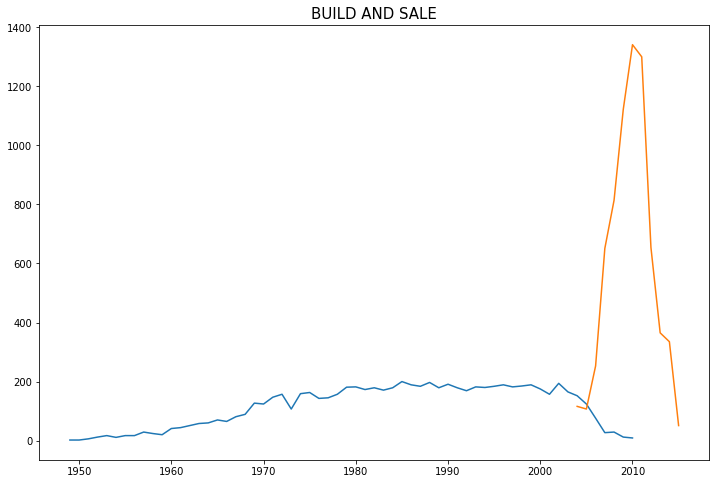

In [ ]:
df_sale = df.groupby('SALE_YEAR')['AREA'].agg([('sale_year','count')])
df_build = df.groupby('BUILD_YEAR')['AREA'].agg([('build_year','count')])

df_build_sale = df_build.merge(df_sale,how = 'outer', left_on=df_build.index, right_on=df_sale.index)
plt.plot(df_build_sale['key_0'],df_build_sale['build_year'],label='build')
plt.plot(df_build_sale['key_0'],df_build_sale['sale_year'],label='sale')
plt.title('BUILD AND SALE',size=15)
plt.show()

No of House Build between 2004 to 2015 increased compared to 1950 to 2003

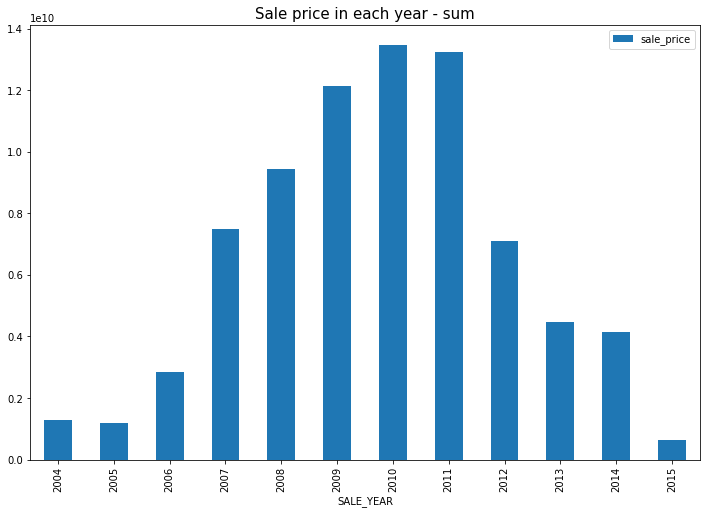

In [ ]:
df.groupby('SALE_YEAR')['SALES_PRICE'].agg([('sale_price','sum')]).plot(kind = 'bar')
plt.title('Sale price in each year - sum',size=15)
plt.show()

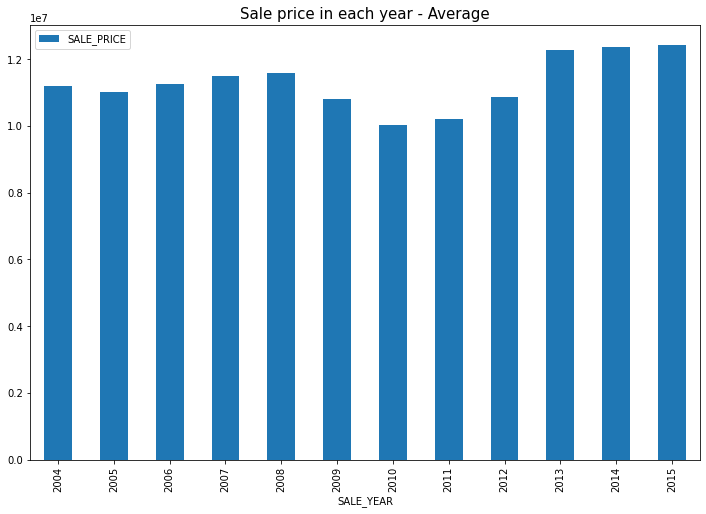

In [ ]:
df.groupby('SALE_YEAR')['SALES_PRICE'].agg([('SALE_PRICE','mean')]).plot(kind = 'bar')
plt.title('Sale price in each year - Average',size=15)
plt.show()

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'PRICE_PER_SQFT', 'SALE_YEAR', 'BUILD_YEAR'],
      dtype='object')

In [ ]:
df['SALE_MONTH']=df['DATE_SALE'].dt.month
df['BUILD_MONTH']=df['DATE_BUILD'].dt.month

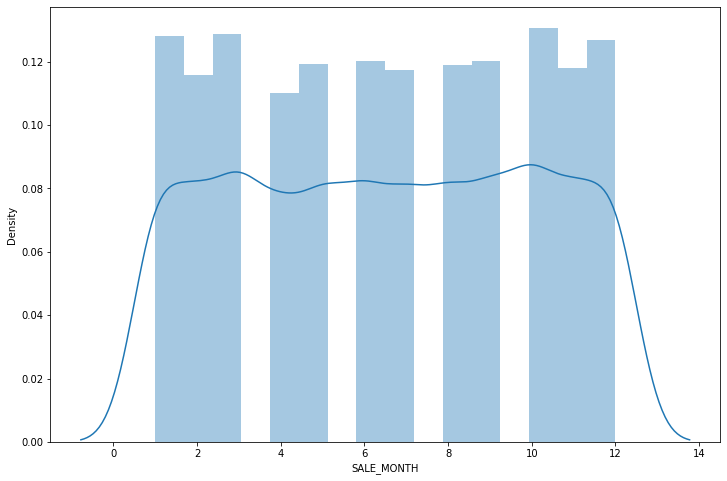

In [ ]:
sns.distplot(df['SALE_MONTH'])
plt.show()

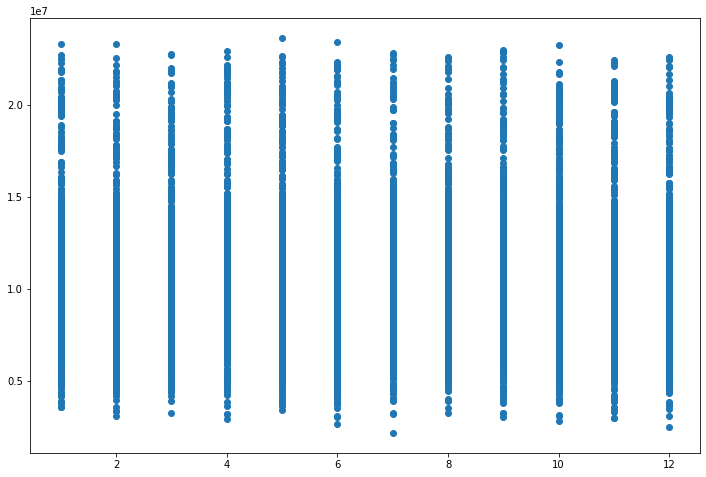

In [ ]:
plt.scatter(df['SALE_MONTH'],df['SALES_PRICE'])
plt.show()

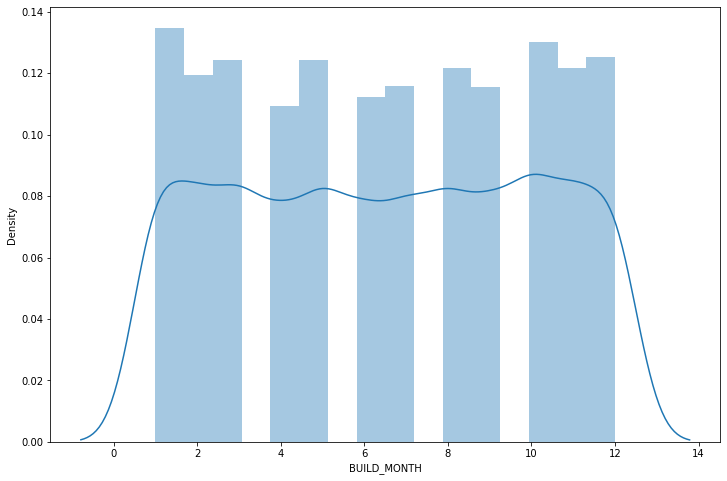

In [ ]:
sns.distplot(df['BUILD_MONTH'])
plt.show()

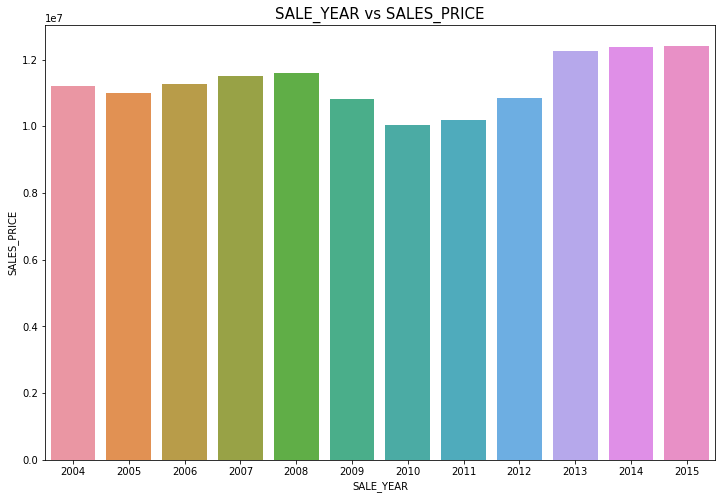

In [ ]:
sns.barplot(x='SALE_YEAR',y='SALES_PRICE',
            data=df.groupby('SALE_YEAR')['SALES_PRICE'].mean().reset_index().sort_values(by='SALES_PRICE'))
plt.title('SALE_YEAR vs SALES_PRICE',size=15)
plt.show()


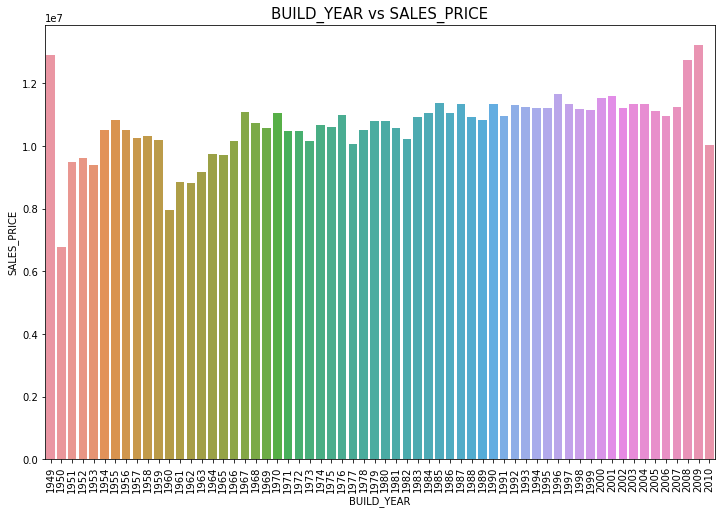

In [ ]:
sns.barplot(x='BUILD_YEAR',y='SALES_PRICE',data=df.groupby('BUILD_YEAR')['SALES_PRICE'].mean().reset_index().sort_values(by='SALES_PRICE'))
plt.title('BUILD_YEAR vs SALES_PRICE',size=15)
plt.xticks(rotation = 90)
plt.show()

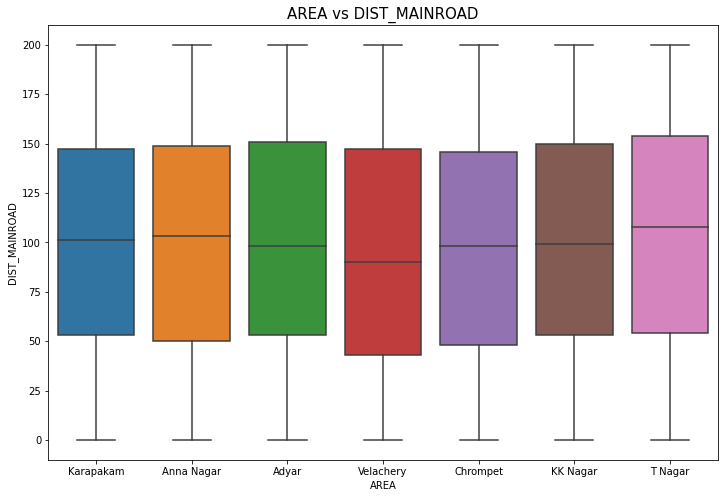

In [ ]:
sns.boxplot(df['AREA'],df['DIST_MAINROAD'])
plt.title('AREA vs DIST_MAINROAD',size=15)
plt.show()

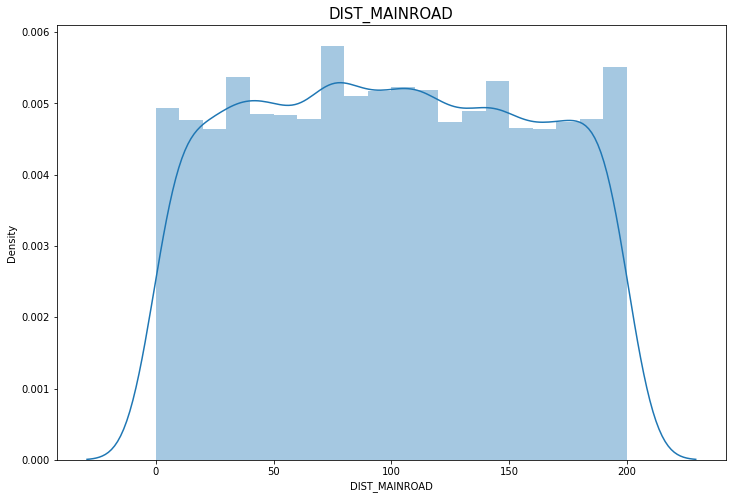

In [ ]:
sns.distplot(df['DIST_MAINROAD'])
plt.title('DIST_MAINROAD',size = 15)
plt.show()

**Finding the rate increase in sales price based on diiferent Features**

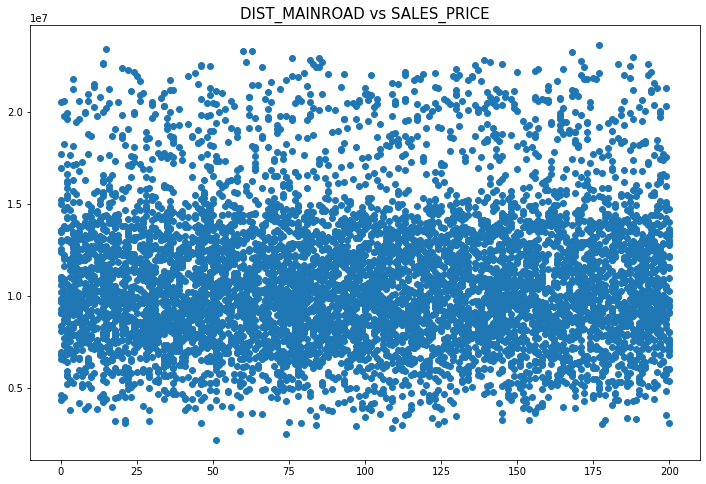

In [ ]:
plt.scatter(df['DIST_MAINROAD'],df['SALES_PRICE'])
plt.title('DIST_MAINROAD vs SALES_PRICE',size=15)
plt.show()

We could see that houses near the main road sells at a high price**

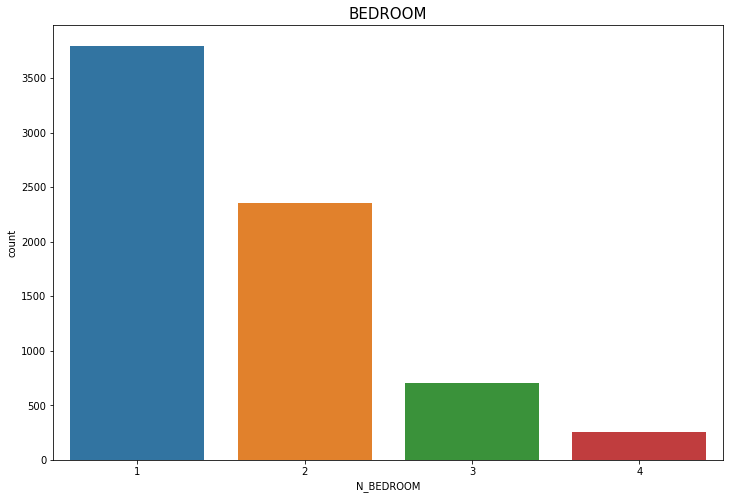

In [ ]:
sns.countplot(df['N_BEDROOM'])
plt.title('BEDROOM',size = 15)
plt.show()

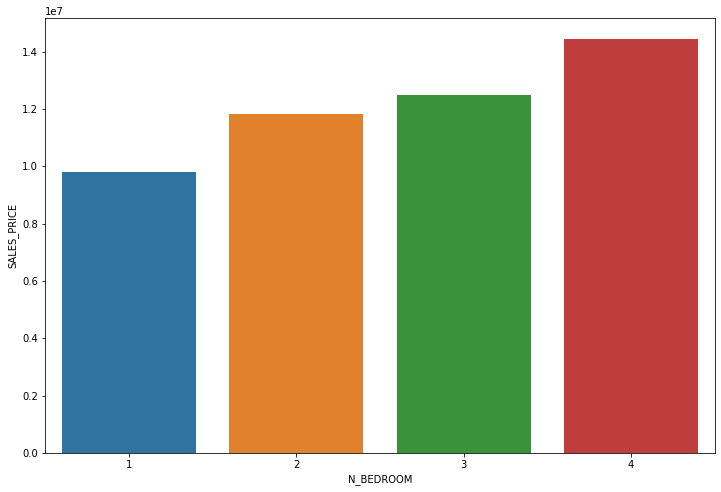

In [ ]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df.groupby('N_BEDROOM').mean().reset_index().sort_values('SALES_PRICE'))
plt.show()

The Sales Price increases as No of BedRoms increase

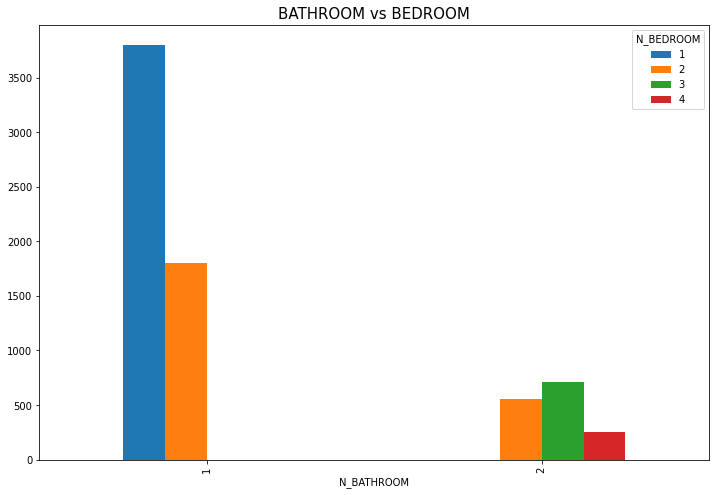

In [ ]:
pd.crosstab(df['N_BATHROOM'],df['N_BEDROOM']).plot(kind='bar')
plt.title('BATHROOM vs BEDROOM',size = 15)
plt.show()

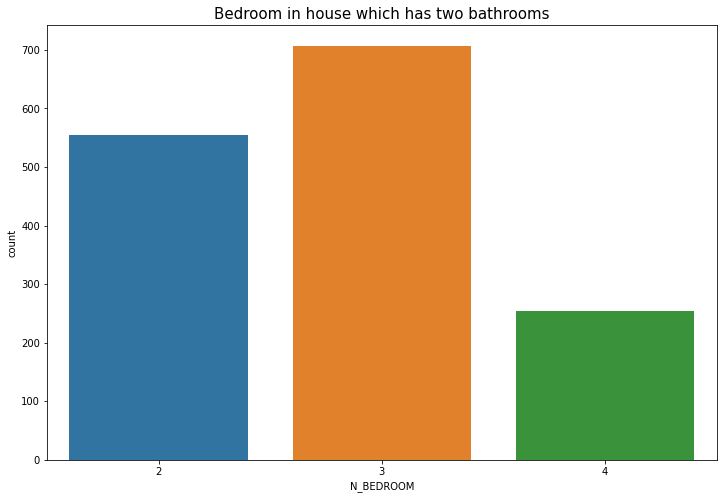

In [ ]:
sns.countplot(df[df['N_BATHROOM']>1]['N_BEDROOM'])
plt.title('Bedroom in house which has two bathrooms',size = 15)
plt.show()

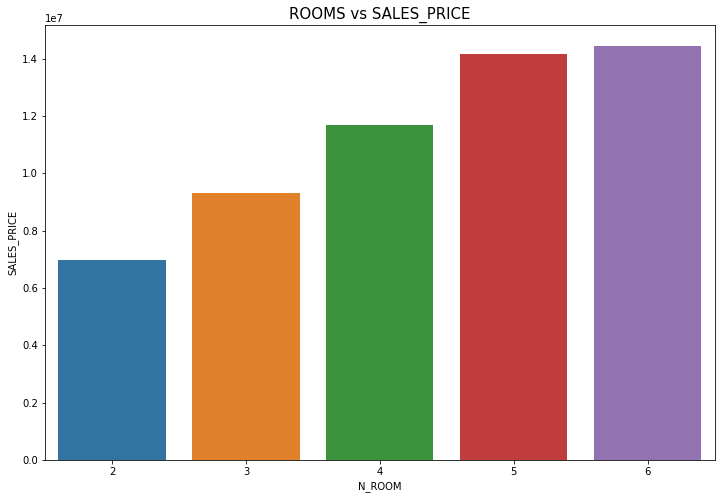

In [ ]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df.groupby('N_ROOM').mean().reset_index().sort_values('SALES_PRICE'))
plt.title('ROOMS vs SALES_PRICE',size = 15)
plt.show()

We can clearly see that increase in NO_ROOMS play a role in Sales_Price hike

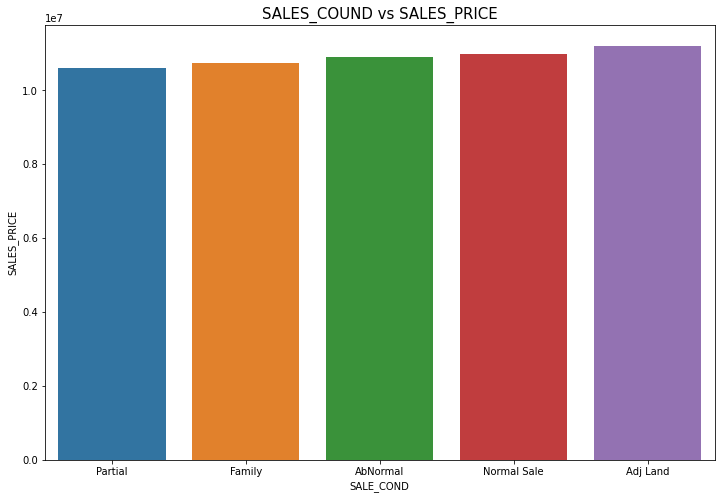

In [ ]:
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE'))
plt.title('SALES_COUND vs SALES_PRICE',size = 15)
plt.show()

Sales condition doesnt play a major role in sales_price hike

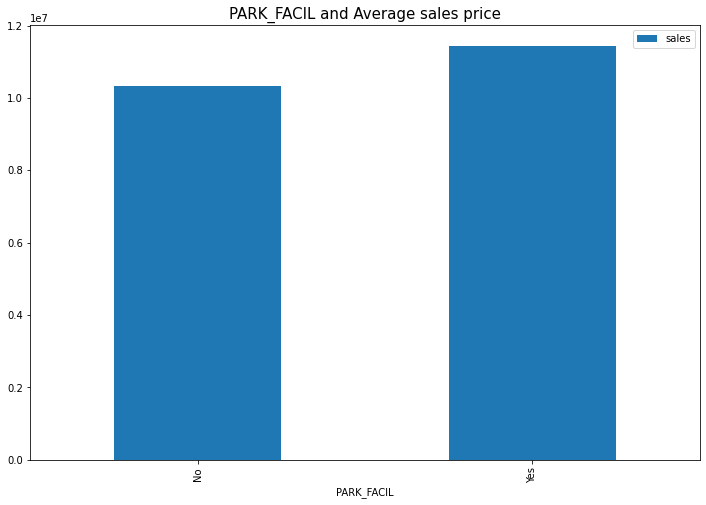

In [ ]:
df.groupby('PARK_FACIL')['SALES_PRICE'].agg([('sales','mean')]).plot(kind='bar')
plt.title('PARK_FACIL and Average sales price',size=15)
plt.show()

Parking Facility does play a minor increase in sales price 

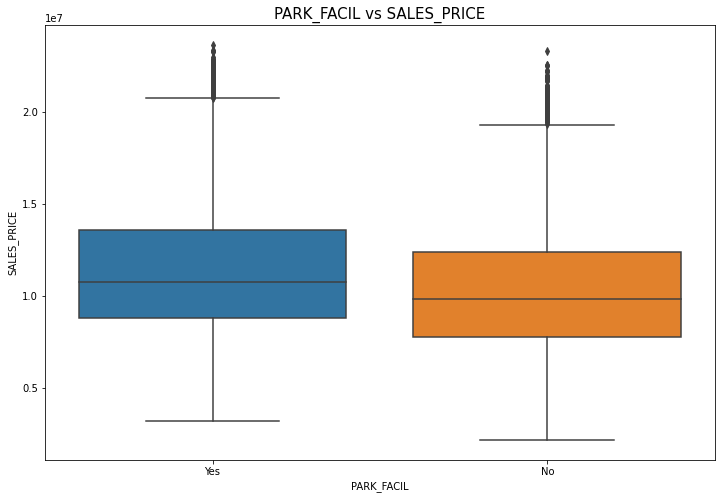

In [ ]:
sns.boxplot(df['PARK_FACIL'],df['SALES_PRICE'])
plt.title('PARK_FACIL vs SALES_PRICE',size=15)
plt.show()

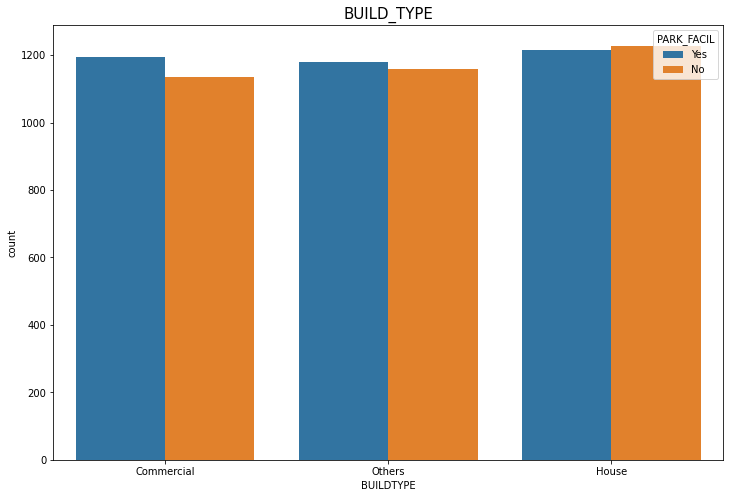

In [ ]:
sns.countplot(df['BUILDTYPE'],hue=df['PARK_FACIL'])
plt.title('BUILD_TYPE',size=15)
plt.show()

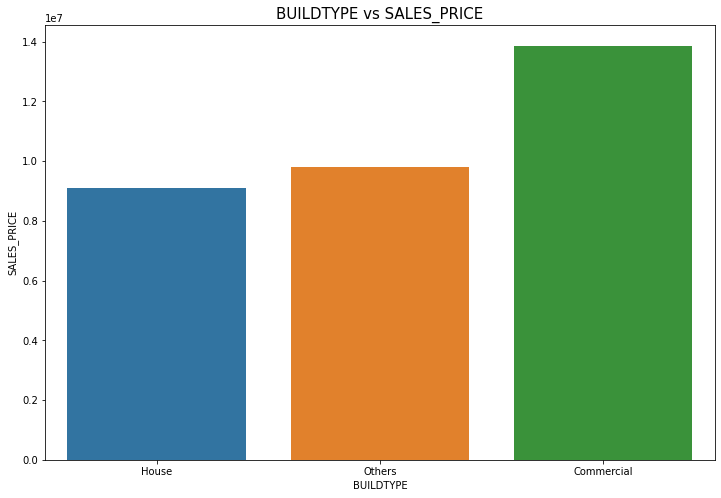

In [ ]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE'))
plt.title('BUILDTYPE vs SALES_PRICE',size = 15)
plt.show()

Commercial building is priced higher than the others

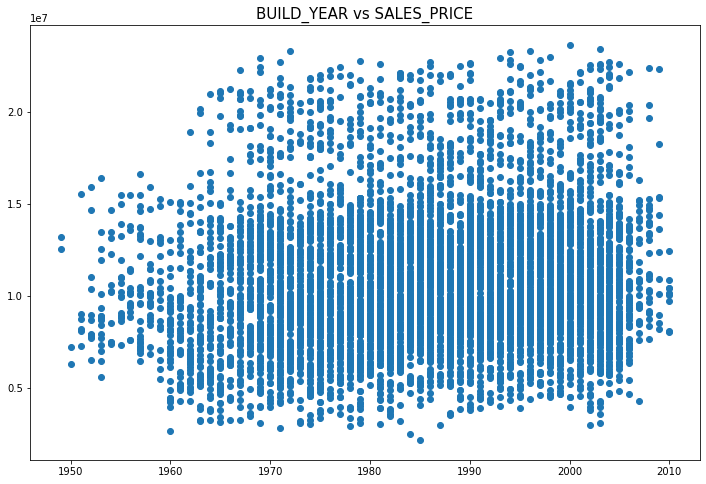

In [ ]:
plt.scatter(df['BUILD_YEAR'],df['SALES_PRICE'])
plt.title('BUILD_YEAR vs SALES_PRICE',size=15)
plt.show()

In [ ]:
df['DAYS_BEFORE_SALE']=df['DATE_SALE'] - df['DATE_BUILD']

df['DAYS_BEFORE_SALE'] = df['DAYS_BEFORE_SALE'].dt.days

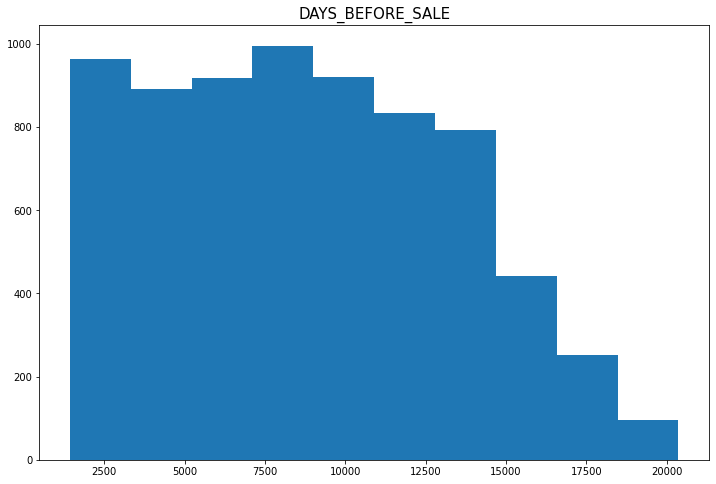

In [ ]:
plt.hist(df['DAYS_BEFORE_SALE'])
plt.title('DAYS_BEFORE_SALE',size=15)
plt.show()

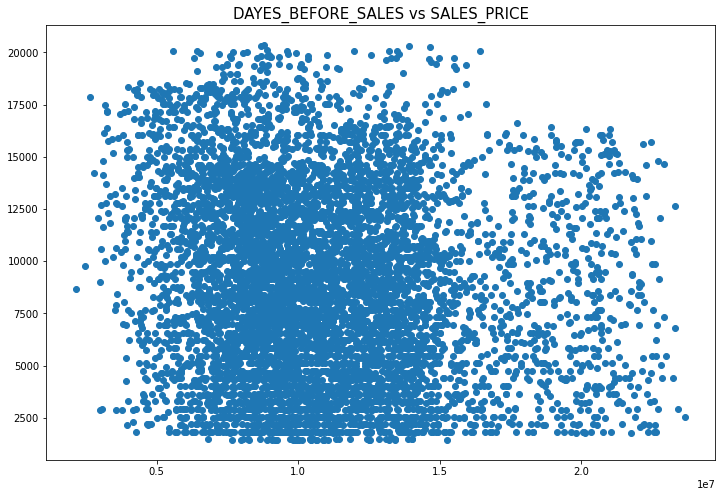

In [ ]:
plt.scatter(df['SALES_PRICE'], df['DAYS_BEFORE_SALE'])
plt.title('DAYES_BEFORE_SALES vs SALES_PRICE',size=15)
plt.show()

<function matplotlib.pyplot.show>

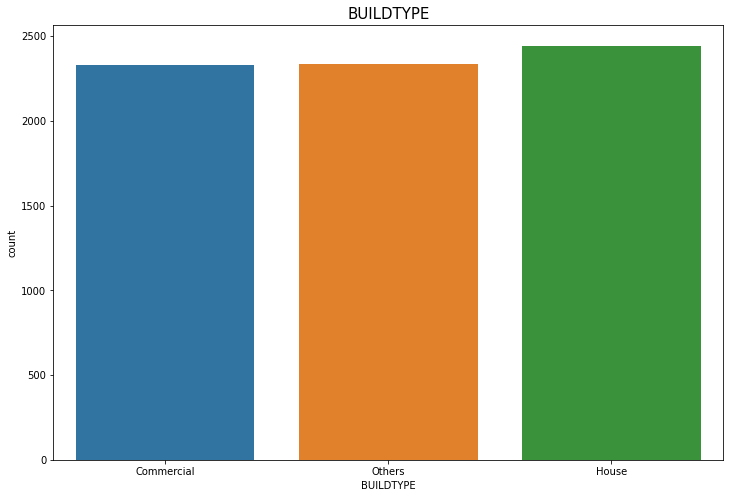

In [ ]:
sns.countplot(df['BUILDTYPE'])
plt.title('BUILDTYPE',size=15)
plt.show


In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
commercial_df = df[df['BUILDTYPE'] =='Commercial']
others_df = df[df['BUILDTYPE'] == 'Others']
house_df = df[df['BUILDTYPE'] == 'House']

com_grp  =  commercial_df.groupby('BUILD_YEAR')['BUILD_YEAR'].agg([('commercial','count')])
oth_grp  =  others_df.groupby('BUILD_YEAR')['BUILD_YEAR'].agg([('others','count')])
hou_grp  =  house_df.groupby('BUILD_YEAR')['BUILD_YEAR'].agg([('house','count')])
grp_df  =  hou_grp.merge(oth_grp, how = 'outer', left_on = hou_grp.index,right_on=oth_grp.index).set_index('key_0')
grp_df  =  grp_df.merge(com_grp, how = 'outer',left_on = grp_df.index,right_on=com_grp.index).set_index('key_0')
grp_df.head(2)

,house,others,commercial
key_0,,,
1950,2.0,NaN,NaN
1951,2.0,3.0,1.0


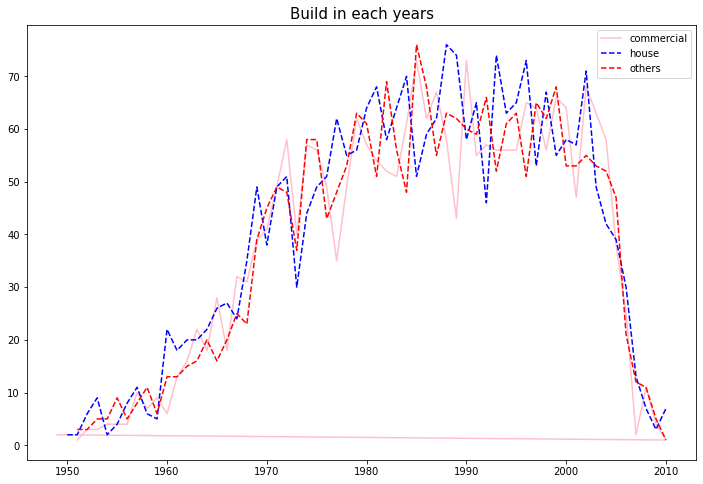

In [ ]:
plt.plot(grp_df['commercial'],color = 'pink',label = 'commercial')
plt.plot(grp_df['house'],'b--',label = 'house')
plt.plot(grp_df['others'],'r--',label  = 'others')
plt.title('Build in each years',size=15)
plt.legend()
plt.show()

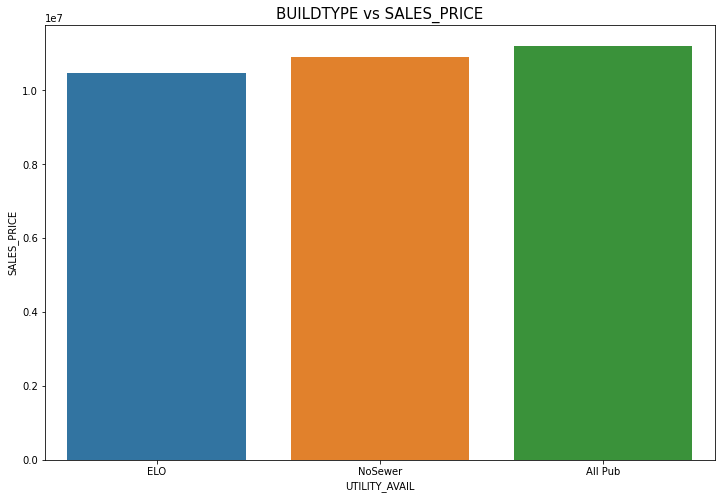

In [ ]:
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE'))
plt.title('BUILDTYPE vs SALES_PRICE',size = 15)
plt.show()

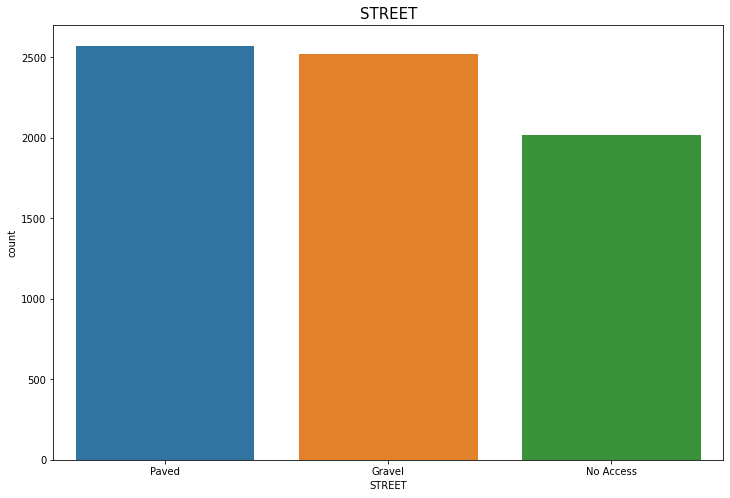

In [ ]:
sns.countplot(df['STREET'])
plt.title('STREET',size=15)
plt.show()

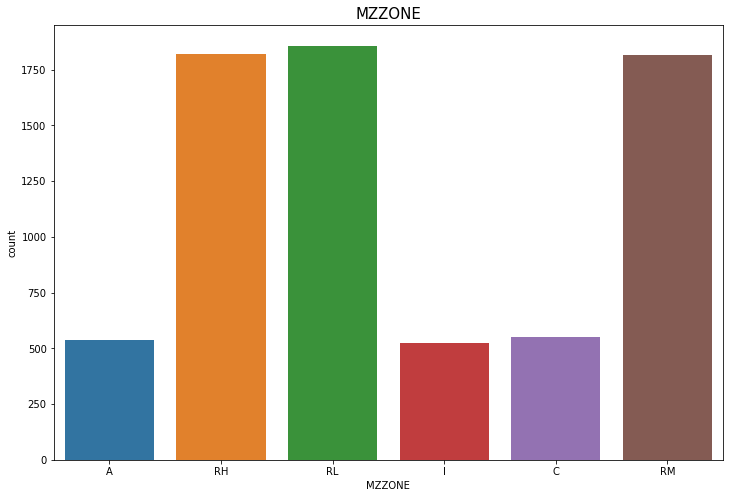

In [ ]:
sns.countplot(df['MZZONE'])
plt.title('MZZONE',size=15)
plt.show()

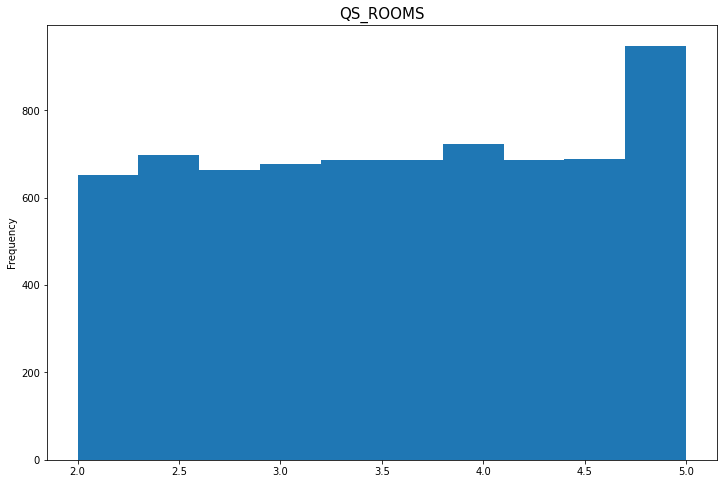

In [ ]:
df['QS_ROOMS'].plot(kind='hist')
plt.title('QS_ROOMS',size=15)
plt.show()

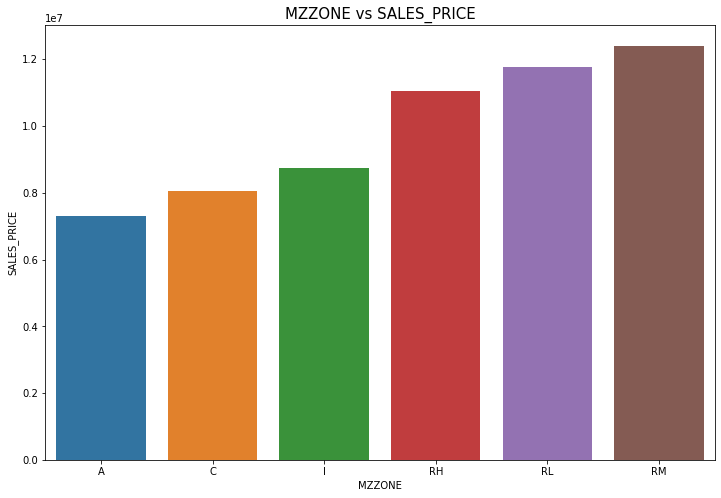

In [ ]:
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE'))
plt.title('MZZONE vs SALES_PRICE',size = 15)
plt.show()

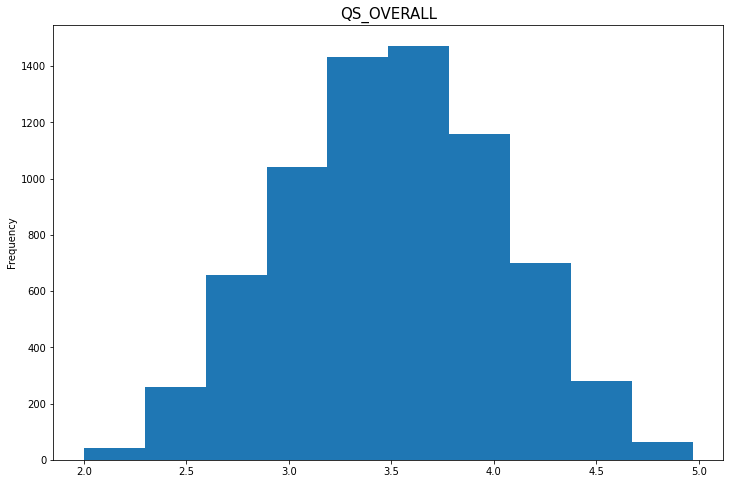

In [ ]:
df['QS_OVERALL'].plot(kind='hist')
plt.title('QS_OVERALL',size=15)
plt.show()

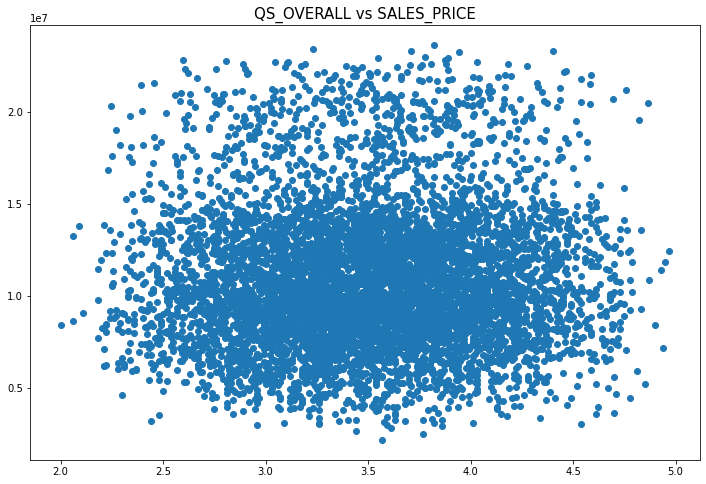

In [ ]:
plt.scatter(df['QS_OVERALL'],df['SALES_PRICE'])
plt.title('QS_OVERALL vs SALES_PRICE',size=15)
plt.show()

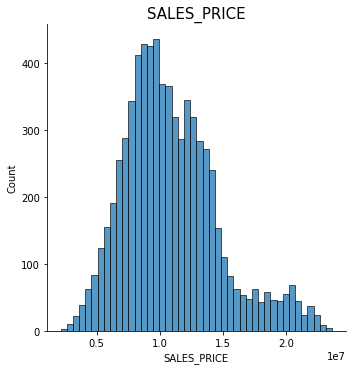

In [ ]:
sns.displot(df['SALES_PRICE'])
plt.title('SALES_PRICE',size=15)
plt.show()

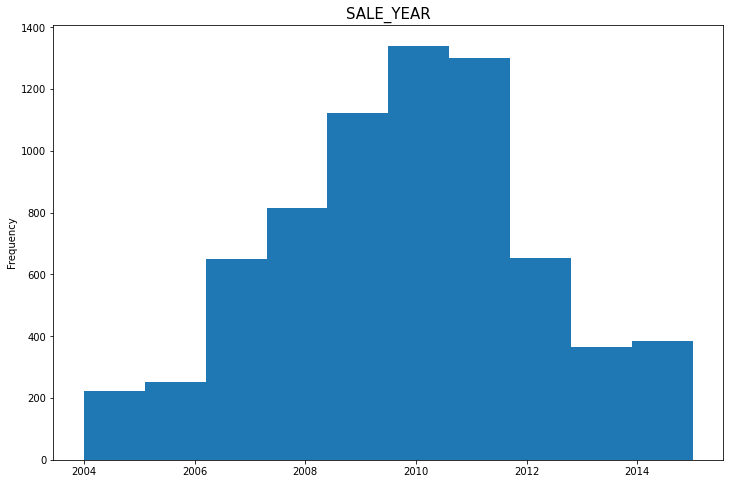

In [ ]:
df['SALE_YEAR'].plot(kind='hist')
plt.title('SALE_YEAR',size=15)
plt.show()

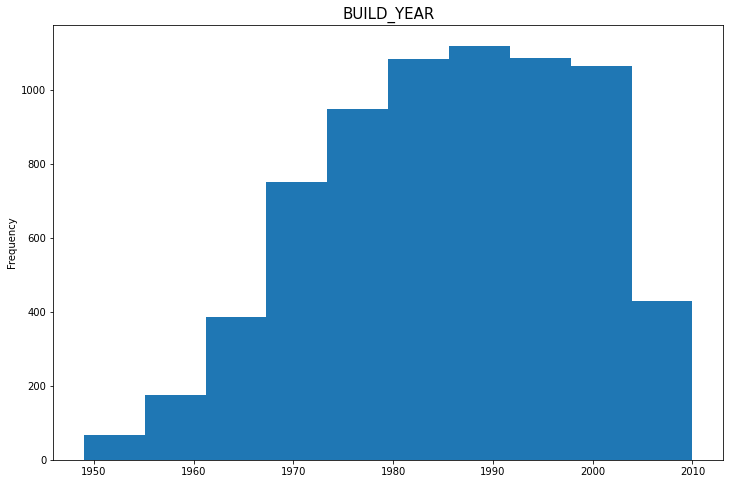

In [ ]:
df['BUILD_YEAR'].plot(kind='hist')
plt.title('BUILD_YEAR',size=15)
plt.show()

## DATA ENCODING

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,PRICE_PER_SQFT,SALE_YEAR,BUILD_YEAR,SALE_MONTH,BUILD_MONTH,DAYS_BEFORE_SALE
0,Karapakam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,7569.721116,2011,1967,4,5,16031
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10935.433031,2006,1995,12,12,4015
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,14476.567657,2012,1992,4,9,7152
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,5191.530997,2010,1988,3,3,8030
4,Karapakam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,6040.986949,2009,1979,5,10,10802


In [ ]:
df.groupby('AREA')['SALES_PRICE'].agg([('values','mean')]).sort_values(by='values')

,values
AREA,
Karapakam,7.340100e+06
Adyar,9.185668e+06
Chrompet,1.001381e+07
Velachery,1.104735e+07
KK Nagar,1.269623e+07
Anna Nagar,1.516820e+07
T Nagar,1.561674e+07


In [ ]:
df['AREA'] = df['AREA'].replace({'Karapakam':0,
                               'Adyar':1,
                               'Chrompet':2,
                               'Velachery':3,
                               'KK Nagar':4,
                               'Anna Nagar':5,
                               'T Nagar':6})

In [ ]:
df.groupby('SALE_COND')['SALES_PRICE'].mean('SALES_PRICE').reset_index().sort_values('SALES_PRICE')

,SALE_COND,SALES_PRICE
4,Partial,1.061637e+07
2,Family,1.073642e+07
0,AbNormal,1.091463e+07
3,Normal Sale,1.099418e+07
1,Adj Land,1.120931e+07


In [ ]:
df['SALE_COND']=df['SALE_COND'].replace({'Partial':0,
                                         'Family':1,
                                         'AbNormal':2,
                                         'Normal Sale':3,
                                         'Adj Land':4})

In [ ]:
df['PARK_FACIL']=df['PARK_FACIL'].replace({'No':0,
                                           'Yes':1})

In [ ]:
build_type=pd.get_dummies(df['BUILDTYPE'],drop_first=True)

In [ ]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean('SALES_PRICE').reset_index().sort_values('SALES_PRICE')

,UTILITY_AVAIL,SALES_PRICE
1,ELO,1.046941e+07
2,NoSewer,1.090923e+07
0,All Pub,1.121002e+07


In [ ]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace({'ELO':0,
                                                 'NoSewer':1,
                                                 'All Pub':2})

In [ ]:
df.groupby('STREET')['SALES_PRICE'].mean('SALES_PRICE').reset_index().sort_values('SALES_PRICE')


,STREET,SALES_PRICE
1,No Access,1.000074e+07
2,Paved,1.105754e+07
0,Gravel,1.144462e+07


In [ ]:
df['STREET']=df['STREET'].replace({'No Access':0,
                                   'Paved':1,
                                   'Gravel':2})

In [ ]:
df.groupby('MZZONE')['SALES_PRICE'].mean('SALES_PRICE').reset_index().sort_values('SALES_PRICE')


,MZZONE,SALES_PRICE
0,A,7.292591e+06
1,C,8.052270e+06
2,I,8.738633e+06
3,RH,1.103997e+07
4,RL,1.176576e+07
5,RM,1.240707e+07


In [ ]:
df['MZZONE']=df['MZZONE'].replace({'A':0,
                                   'C':1,
                                   'I':2,
                                   'RH':3,
                                   'RL':4,
                                   'RM':5})

In [ ]:
df_new = pd.concat([df,build_type],axis=1)

In [ ]:
df_new.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,PRICE_PER_SQFT,SALE_YEAR,BUILD_YEAR,SALE_MONTH,BUILD_MONTH,DAYS_BEFORE_SALE,House,Others
0,0,1004,2011-04-05,131,1,1,3,2,1,1967-05-15,Commercial,2,1,0,4.0,3.9,4.9,4.330,380000,144400,7600000,7569.721116,2011,1967,4,5,16031,0,0
1,5,1986,2006-12-19,26,2,1,5,2,0,1995-12-22,Commercial,2,2,3,4.9,4.2,2.5,3.765,760122,304049,21717770,10935.433031,2006,1995,12,12,4015,0,0
2,1,909,2012-04-02,70,1,1,3,2,1,1992-09-02,Commercial,0,2,4,4.1,3.8,2.2,3.090,421094,92114,13159200,14476.567657,2012,1992,4,9,7152,0,0
3,3,1855,2010-03-13,14,3,2,5,1,0,1988-03-18,Others,1,1,2,4.7,3.9,3.6,4.010,356321,77042,9630290,5191.530997,2010,1988,3,3,8030,0,1
4,0,1226,2009-05-10,84,1,1,3,2,1,1979-10-13,Others,2,2,1,3.0,2.5,4.1,3.290,237000,74063,7406250,6040.986949,2009,1979,5,10,10802,0,1


In [ ]:
df_new.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'PRICE_PER_SQFT', 'SALE_YEAR', 'BUILD_YEAR',
       'SALE_MONTH', 'BUILD_MONTH', 'DAYS_BEFORE_SALE', 'House', 'Others'],
      dtype='object')

we should drop the features irrelevnt to finding the sales price

In [ ]:
df_new.drop(['DATE_SALE','DATE_BUILD','BUILDTYPE'],axis=1,inplace=True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AREA              7109 non-null   int64  
 1   INT_SQFT          7109 non-null   int64  
 2   DIST_MAINROAD     7109 non-null   int64  
 3   N_BEDROOM         7109 non-null   int64  
 4   N_BATHROOM        7109 non-null   int64  
 5   N_ROOM            7109 non-null   int64  
 6   SALE_COND         7109 non-null   int64  
 7   PARK_FACIL        7109 non-null   int64  
 8   UTILITY_AVAIL     7109 non-null   int64  
 9   STREET            7109 non-null   int64  
 10  MZZONE            7109 non-null   int64  
 11  QS_ROOMS          7109 non-null   float64
 12  QS_BATHROOM       7109 non-null   float64
 13  QS_BEDROOM        7109 non-null   float64
 14  QS_OVERALL        7109 non-null   float64
 15  REG_FEE           7109 non-null   int64  
 16  COMMIS            7109 non-null   int64  


In [ ]:
df_new.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'PRICE_PER_SQFT', 'SALE_YEAR',
       'BUILD_YEAR', 'SALE_MONTH', 'BUILD_MONTH', 'DAYS_BEFORE_SALE', 'House',
       'Others'],
      dtype='object')

In [ ]:
df_new['SALES_PRICE'] = df_new['REG_FEE'] + df_new['COMMIS'] + df_new['SALES_PRICE']

In [ ]:
# Dropping irrelevant features
df_new.drop(['REG_FEE','COMMIS'], axis = 1, inplace = True)

## MODEL FITTING

In [ ]:
df_new.isna().sum()

AREA                0
INT_SQFT            0
DIST_MAINROAD       0
N_BEDROOM           0
N_BATHROOM          0
N_ROOM              0
SALE_COND           0
PARK_FACIL          0
UTILITY_AVAIL       0
STREET              0
MZZONE              0
QS_ROOMS            0
QS_BATHROOM         0
QS_BEDROOM          0
QS_OVERALL          0
SALES_PRICE         0
PRICE_PER_SQFT      0
SALE_YEAR           0
BUILD_YEAR          0
SALE_MONTH          0
BUILD_MONTH         0
DAYS_BEFORE_SALE    0
House               0
Others              0
dtype: int64

In [ ]:
x=df_new.drop(['SALES_PRICE'],axis=1).copy()
y=df_new['SALES_PRICE'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=3,random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

print(X_train.columns)

#transforming features which don't have linear relationship with target feature
X_train['SALE_YEAR'] = sc.fit_transform(X_train[['SALE_YEAR']])
X_test['SALE_YEAR']  = sc.transform(X_test[['SALE_YEAR']])

X_train['DIST_MAINROAD'] = sc.fit_transform(X_train[['DIST_MAINROAD']])
X_test['DIST_MAINROAD']  = sc.transform(X_test[['DIST_MAINROAD']])

X_train['BUILD_YEAR'] = sc.fit_transform(X_train[['BUILD_YEAR']])
X_test['BUILD_YEAR']  = sc.transform(X_test[['BUILD_YEAR']])

X_train['DAYS_BEFORE_SALE'] = sc.fit_transform(X_train[['DAYS_BEFORE_SALE']])
X_test['DAYS_BEFORE_SALE']  = sc.transform(X_test[['DAYS_BEFORE_SALE']])


Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'PRICE_PER_SQFT', 'SALE_YEAR', 'BUILD_YEAR', 'SALE_MONTH',
       'BUILD_MONTH', 'DAYS_BEFORE_SALE', 'House', 'Others'],
      dtype='object')


**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train,y_train)
LinearRegression()

pred = linear_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score 

r2_score(y_test,pred)

0.935829434032579

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_thres=VarianceThreshold(threshold=1)
var_thres.fit(X_train)

var_thres.get_support()

array([ True,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False])

In [ ]:
constant_names = [column for column in X_train.columns if column not in x.columns[var_thres.get_support()]]
constant_names

['DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'PARK_FACIL',
 'UTILITY_AVAIL',
 'STREET',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'DAYS_BEFORE_SALE',
 'House',
 'Others']

In [ ]:
X_train.columns[var_thres.get_support()]

Index(['AREA', 'INT_SQFT', 'N_ROOM', 'SALE_COND', 'MZZONE', 'PRICE_PER_SQFT',
       'SALE_YEAR', 'BUILD_YEAR', 'SALE_MONTH', 'BUILD_MONTH'],
      dtype='object')

Build models with selected Features

In [ ]:
X_train_sup = X_train[X_train.columns[var_thres.get_support()]]
X_test_sup = X_test[X_test.columns[var_thres.get_support()]]

In [ ]:
lr=LinearRegression()
lr.fit(X_train_sup,y_train)

pred=lr.predict(X_test_sup)

r2_score(y_test,pred)

0.8950140821339603

To interpret the model we should use all the features

**REGRESSORS**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

In [ ]:
lin_reg = LinearRegression()
d_tree = DecisionTreeRegressor()
svr = SVR()
ran_for = RandomForestRegressor()
sgdr = SGDRegressor()
xgb = XGBRegressor()

In [ ]:
lin_reg.fit(X_train , y_train)
pred = lin_reg.predict(X_test)
print('*****R Squared*****')
print(r2_score(y_test,pred))

*****R Squared*****
0.935829434032579


In [ ]:
d_tree.fit(X_train , y_train)
pred = d_tree.predict(X_test)
print('*****R Squared*****')
print(r2_score(y_test,pred))

*****R Squared*****
0.9758373194359635


In [ ]:
svr.fit(X_train , y_train)
pred = svr.predict(X_test)
print('*****R Squared*****')
print(r2_score(y_test,pred))

*****R Squared*****
-2.8770051400728724


In [ ]:
ran_for.fit(X_train , y_train)
pred = ran_for.predict(X_test)
print('*****R Squared*****')
print(r2_score(y_test,pred))

*****R Squared*****
0.9973807407709362


In [ ]:
sgdr.fit(X_train , y_train)
pred = sgdr.predict(X_test)
print('*****R Squared*****')
print(r2_score(y_test,pred))

*****R Squared*****
-1.2499493821448727e+19


In [ ]:
xgb.fit(X_train , y_train)
pred = xgb.predict(X_test)
print('*****R Squared*****')
print(r2_score(y_test,pred))

[10:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
*****R Squared*****
0.9978755144525512


XGBRegressor give good score

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(xgb , X_train , y_train , scoring = 'r2' , cv = 5)

[10:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:45:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:45:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.99351626, 0.99180082, 0.99238917, 0.99232212, 0.99228365])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x)for x in np.linspace(200,2000,10)]
max_features=['auto','sqrt']
max_depth=[int(x)for x in np.linspace(10,110,11)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
random_grid={'n_estimators':n_estimators,'max_features':max_features,
             'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

In [ ]:
rcv = RandomizedSearchCV(ran_for, random_grid,cv = 3,verbose = 2,random_state = 42,n_jobs=-1)

rcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rcv.best_score_

0.9949126492134258

In [ ]:
rcv.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1800}

In [ ]:
rf_regressor = RandomForestRegressor(bootstrap = True , max_depth = 70, max_features = 'auto', min_samples_leaf = 1,min_samples_split = 5,n_estimators = 1200)

rf_regressor.fit(X_train,y_train)

pred_vals=rf_regressor.predict(X_test)

r2_score(y_test,pred_vals)


0.9986807697913082

**Important Features**

In [ ]:
pd.DataFrame({'Important_features':rf_regressor.feature_importances_},index = X_train.columns).sort_values(by='Important_features' , ascending = False)

,Important_features
AREA,0.438494
PRICE_PER_SQFT,0.280178
INT_SQFT,0.118610
Others,0.072370
House,0.041713
N_BEDROOM,0.012555
N_BATHROOM,0.012018
MZZONE,0.011938
N_ROOM,0.003575
PARK_FACIL,0.003154


**The Most important Feature is 'AREA'**

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=1)

x_single=pca.fit_transform(X_train)

x1=X_train[['AREA','INT_SQFT','Others','House','N_BEDROOM','N_BATHROOM','N_ROOM','PARK_FACIL']]

X_train_PCA = pca.fit_transform(x1)


***To predict range lets choose x with correlated features***


In [ ]:
x2 = X_test[['AREA','INT_SQFT','Others','House','N_BEDROOM','N_BATHROOM','N_ROOM','PARK_FACIL']]

X_test_pca = pca.transform(x2)

len(X_train_PCA),len(y_train)

y_train


2716     5189490
5459    14035224
4168    10631324
779     10674637
5096     9406829
          ...   
4931    13517003
3264    14308876
1653    12176545
2607    17726898
2732    13051353
Name: SALES_PRICE, Length: 7106, dtype: int64

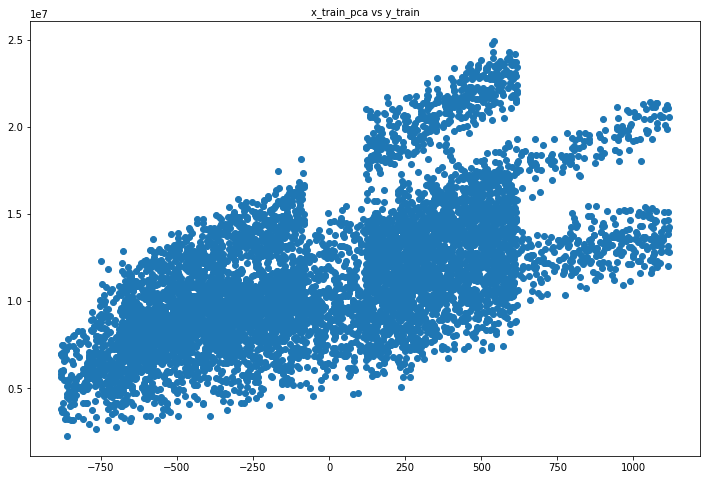

In [ ]:
plt.scatter(X_train_PCA,y_train)
plt.title('x_train_pca vs y_train' , size = 10)
plt.show()

In [ ]:
# Standard Deviation
s = np.std(X_train_PCA)

interval=1.96*s

rf_regressor.fit(X_train_PCA,y_train)

to_pred = X_test_pca[1]

pred_value=rf_regressor.predict([to_pred])

pred_value

array([14236639.68817283])

In [ ]:
lower,upper=pred_value - interval,pred_value + interval

print(f'Predicated output range between:{lower}and{upper}')

Predicated output range between:[14235743.19690583]and[14237536.17943983]


In [ ]:
lr_model=LinearRegression()

lr_model.fit(X_train_PCA,y_train)

b0,b1=lr_model.coef_,lr_model.intercept_

reg=X_train_PCA * b0 + b1

lr_predicted = lr_model.predict([to_pred])

lower,upper = lr_predicted - interval, lr_predicted + interval

s=np.std(y_train)

interval=1.96*s

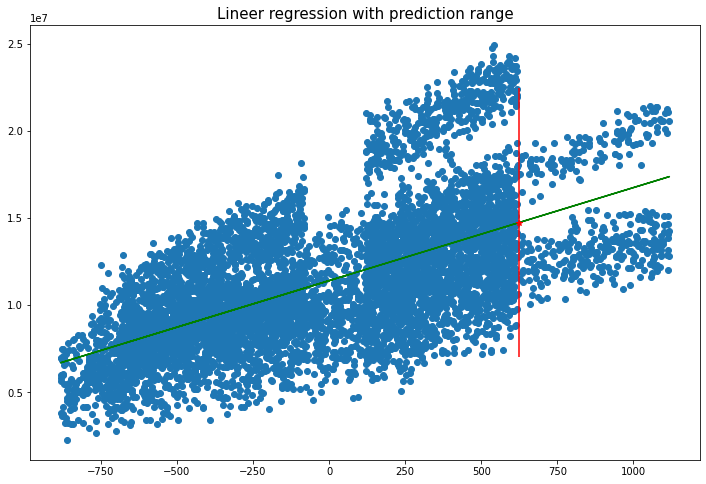

predicated output range between:[14747133.86540496] and [14748926.84793897]


In [ ]:
plt.scatter(X_train_PCA,y_train)
plt.plot(X_train_PCA,reg,color='green')
plt.errorbar(to_pred, lr_predicted, yerr = interval,color='red',fmt='*')
plt.title('Lineer regression with prediction range',size=15)
plt.show()

print(f'predicated output range between:{lower} and {upper}')